# Introducción

Es un enfoque simple pero muy eficiente para el aprendizaje discriminatorio de clasificadores lineales bajo funciones de pérdida convexa tales como Máquinas Vectoriales de Soporte (lineal) y Regresión Logística. A pesar de que SGD ha estado presente en la comunidad de aprendizaje automático durante mucho tiempo, ha recibido una considerable cantidad de atención recientemente en el contexto del aprendizaje a gran escala.

SGD se ha aplicado con éxito a los problemas de aprendizaje a gran escala y escasa máquina de aprendizaje a menudo encontrados en la clasificación de textos y el procesamiento del lenguaje natural.
Las ventajas del descenso de gradiente estocástico son:

Eficiencia.

Facilidad de implementación (muchas oportunidades para el ajuste del código).
Las desventajas del descenso de gradiente estocástico incluyen:
SGD requiere una serie de hiperparámetros como el parámetro de regularización y el número de iteraciones.
SGD es sensible a la escala de las características.

En el descenso de gradientes, un lote es la cantidad total de ejemplos que usas para calcular la gradiente en una sola iteración. Hasta ahora, hemos supuesto que el lote era el conjunto de datos completo. Al trabajar a la escala de Google, los conjuntos de datos suelen tener miles de millones o incluso cientos de miles de millones de ejemplos. Además, los conjuntos de datos de Google con frecuencia contienen inmensas cantidades de atributos. En consecuencia, un lote puede ser enorme. Un lote muy grande puede causar que incluso una sola iteración tome un tiempo muy prolongado para calcularse.

Es probable que un conjunto de datos grande con ejemplos muestreados al azar contenga datos redundantes. De hecho, la redundancia se vuelve más probable a medida que aumenta el tamaño del lote. Un poco de redundancia puede ser útil para atenuar las gradientes inconsistentes, pero los lotes enormes tienden a no tener un valor mucho más predictivo que los lotes grandes.

¿Cómo sería si pudiéramos obtener la gradiente correcta en promedio con mucho menos cómputo? Al elegir ejemplos al azar de nuestro conjunto de datos, podríamos estimar (si bien de manera inconsistente) un promedio grande de otro mucho más pequeño. El descenso de gradiente estocástico (SGD) lleva esta idea al extremo: usa un solo ejemplo (un tamaño del lote de 1) por iteración. Cuando se dan demasiadas iteraciones, el SGD funciona, pero es muy inconsistente. El término "estocástico" indica que el ejemplo único que compone cada lote se elige al azar.

# Ejemplo

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
import time

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=2.5, random_state=95)

X = np.c_[np.ones((X.shape[0])), X]

W = np.random.uniform(size=(X.shape[1],))
 
lossHistory = []

for epoch in np.arange(0, 100):
	epochLoss = []
	for (batchX, batchY) in next_batch(X, y, 32):
		preds = sigmoid_activation(batchX.dot(W))
		error = preds - batchY
		loss = np.sum(error ** 2)
		epochLoss.append(loss)
		gradient = batchX.T.dot(error) / batchX.shape[0]
		W += -0.01 * gradient
	print("===============================")
	time.sleep(0.3)
	lossHistory.append(np.average(epochLoss))
	print ("Gradient: ",gradient)
	print("Loss: ",loss)
	print(epoch)


Gradient:  [ 0.03956312 -0.10239806 -0.17622657]
Loss:  0.11030029623524192
0
Gradient:  [ 0.03569743 -0.08008167 -0.15334354]
Loss:  0.08960078115115332
1
Gradient:  [ 0.03283498 -0.0663766  -0.13769789]
Loss:  0.07570129280600123
2
Gradient:  [ 0.03058496 -0.0570405  -0.12605256]
Loss:  0.06560104511180824
3
Gradient:  [ 0.02874534 -0.05023682 -0.116906  ]
Loss:  0.057878002885539244
4
Gradient:  [ 0.02719871 -0.04503779 -0.109451  ]
Loss:  0.05175693968307814
5
Gradient:  [ 0.02587103 -0.0409227  -0.10320819]
Loss:  0.04677388404847894
6
Gradient:  [ 0.02471275 -0.03757599 -0.09787168]
Loss:  0.042631874273976404
7
Gradient:  [ 0.02368909 -0.0347949  -0.09323532]
Loss:  0.039130940368024704
8
Gradient:  [ 0.02277481 -0.03244297 -0.08915419]
Loss:  0.03613094636438976
9
Gradient:  [ 0.02195097 -0.03042488 -0.0855228 ]
Loss:  0.033530471860858654
10
Gradient:  [ 0.02120307 -0.02867192 -0.0822622 ]
Loss:  0.03125413691343543
11
Gradient:  [ 0.02051972 -0.02713327 -0.07931189]
Loss:  0.

Gradient:  [ 0.00810309 -0.00727233 -0.02952456]
Loss:  0.0044391084584911
74
Gradient:  [ 0.00803383 -0.00719484 -0.02926334]
Loss:  0.004362579207203369
75
Gradient:  [ 0.00796588 -0.00711907 -0.02900717]
Loss:  0.004288145032895735
76
Gradient:  [ 0.00789918 -0.00704499 -0.02875589]
Loss:  0.004215726279405808
77
Gradient:  [ 0.00783371 -0.00697252 -0.02850937]
Loss:  0.004145247179482222
78
Gradient:  [ 0.00776943 -0.00690161 -0.02826746]
Loss:  0.0040766356229535086
79
Gradient:  [ 0.0077063  -0.00683222 -0.02803002]
Loss:  0.004009822941197794
80
Gradient:  [ 0.00764429 -0.00676428 -0.02779691]
Loss:  0.003944743706595121
81
Gradient:  [ 0.00758337 -0.00669777 -0.02756803]
Loss:  0.003881335545764252
82
Gradient:  [ 0.00752352 -0.00663261 -0.02734324]
Loss:  0.0038195389654941325
83
Gradient:  [ 0.00746469 -0.00656879 -0.02712242]
Loss:  0.0037592971903772105
84
Gradient:  [ 0.00740686 -0.00650625 -0.02690547]
Loss:  0.003700556011239877
85
Gradient:  [ 0.00735001 -0.00644495 -0.

# Ejemplos Gráficos

### Ejemplo gráfico #1

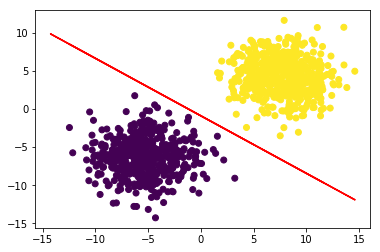

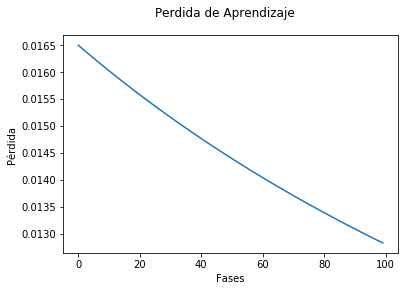

In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
import time

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=2.5, random_state=95)

X = np.c_[np.ones((X.shape[0])), X]
 
W = np.random.uniform(size=(X.shape[1],))
 
lossHistory = []

for epoch in np.arange(0, 100):
	epochLoss = []
	for (batchX, batchY) in next_batch(X, y, 32):
		preds = sigmoid_activation(batchX.dot(W))
		error = preds - batchY
		loss = np.sum(error ** 2)
		epochLoss.append(loss)
		gradient = batchX.T.dot(error) / batchX.shape[0]
		W += -0.001 * gradient
	lossHistory.append(np.average(epochLoss))
Y = (-W[0] - (W[1] * X)) / W[2]

plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")
 
fig = plt.figure()
plt.plot(np.arange(0, 100), lossHistory)
fig.suptitle("Perdida de Aprendizaje")
plt.xlabel("Fases")
plt.ylabel("Pérdida")
plt.show()

### Ejemplo gráfico #2

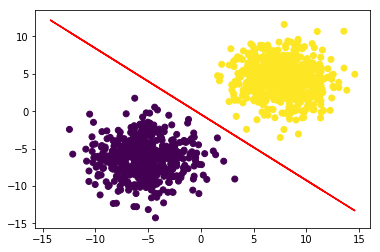

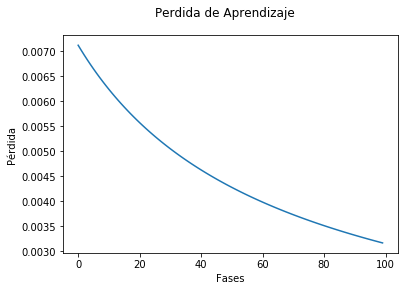

In [3]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
import time

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=2.5, random_state=95)

X = np.c_[np.ones((X.shape[0])), X]
 
W = np.random.uniform(size=(X.shape[1],))
 
lossHistory = []

for epoch in np.arange(0, 100):
	epochLoss = []
	for (batchX, batchY) in next_batch(X, y, 32):
		preds = sigmoid_activation(batchX.dot(W))
		error = preds - batchY
		loss = np.sum(error ** 2)
		epochLoss.append(loss)
		gradient = batchX.T.dot(error) / batchX.shape[0]
		W += -0.01 * gradient
	lossHistory.append(np.average(epochLoss))
Y = (-W[0] - (W[1] * X)) / W[2]

plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")
 
fig = plt.figure()
plt.plot(np.arange(0, 100), lossHistory)
fig.suptitle("Perdida de Aprendizaje")
plt.xlabel("Fases")
plt.ylabel("Pérdida")
plt.show()

# README

### Jupyter

###### Instalación

###### Jupyter notebook

###### Librerías necesarias

###### URL del ejemplo en Github

###### Referencias